In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Making the Hilbert Curve Fractal

In [0]:
def transform_1(x,y):
  x = x/ 2
  y = y/2
  y_ = y
  y = x
  x = y_
  return x,y

In [0]:
def transform_2(x,y):
  x = x/2
  y = y/2
  d = (x[2] - x[0]) 
  D = (x[-1] - x[0] )
  y  = y+d+D
  return x,y

In [0]:
def transform_3(x,y):
  x = x/2
  y = y/2
  d = (x[2] - x[0]) 
  D = (x[-1] - x[0] )
  y = y + D +  d
  x = x + D + d
  return x,y

In [0]:
def transform_4(x,y):
  x = x/2
  y = y/2
  d = (x[2] - x[0]) 
  D = (x[-1] - x[0])
  a = x[-1]
  x_ = a-y
  y_ = a-x

  x = x_
  y = y_
  
  x = x+d+D


  return x,y

In [0]:
def reflect_finder(x,y):
  xp, yp = xp_yp_finder(x,y,-1,1,0)
  xr, yr = reflect(x,y,xp,yp)
  return xr, yr


In [0]:
def reflect(xn,yn,xp,yp):
  xr = xn + 2*(xp-xn)
  yr = yn + 2*(yp-yn)
  return xr, yr

In [0]:
def xp_yp_finder(xn,yn,m,x0,y0):
  xp = (yn-y0 + m*x0 + 1/m * xn)/(m+1/m)
  yp = m*(xp-x0) + y0
  return xp,yp

In [0]:
x = np.array([0,0,1,1])
y = np.array([0,1,1,0])

In [522]:
transform_4(x,y)

(array([1. , 0.5, 0.5, 1. ]), array([1. , 1. , 0.5, 0.5]))

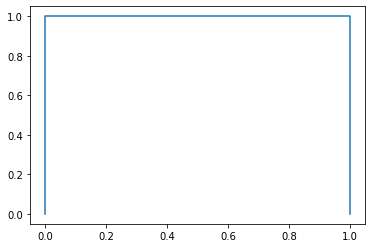

In [327]:
plt.plot(x,y)

In [0]:
x_, y_ = transform_4(x,y)

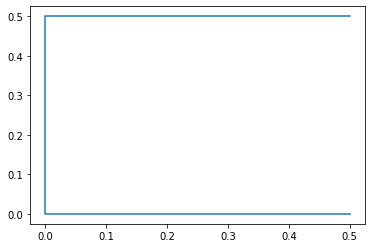

In [558]:
plt.plot(x_,y_)

In [0]:
a,b = 1+3, 3+4

In [0]:
img_x = []
img_y = []
x = np.array([0,0,1,1])
y = np.array([0,1,1,0])
for i in range(1):
  tra_1  = transform_1(x,y)
  img_x += tra_1[0].tolist()
  img_y += tra_1[1].tolist()

  tra_2  = transform_2(x,y)
  img_x += tra_2[0].tolist()
  img_y += tra_2[1].tolist()

  tra_3  = transform_3(x,y)
  img_x += tra_3[0].tolist()
  img_y += tra_3[1].tolist()

  tra_4  = transform_4(x,y)
  img_x += tra_4[0].tolist()
  img_y += tra_4[1].tolist()



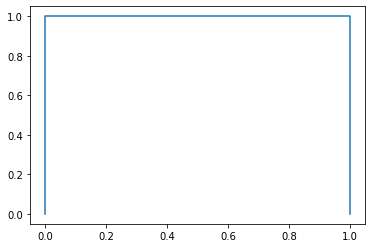

In [127]:
plt.plot(x, y)

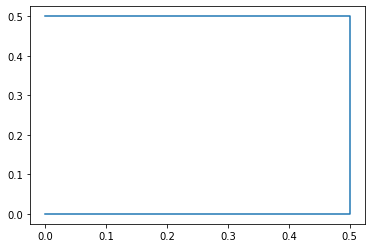

In [381]:
plt.plot(transform_1(x,y)[0], transform_1(x,y)[1])

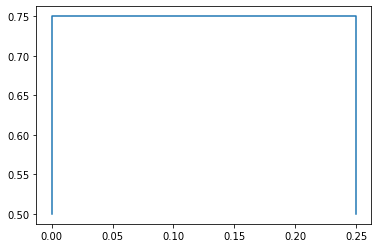

In [205]:
plt.plot(transform_2(x,y)[0], transform_2(x,y)[1])

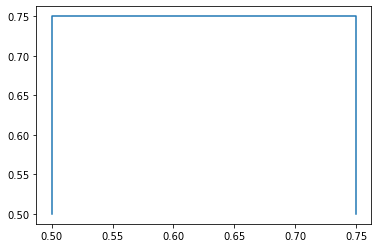

In [206]:
plt.plot(transform_3(x,y)[0], transform_3(x,y)[1])

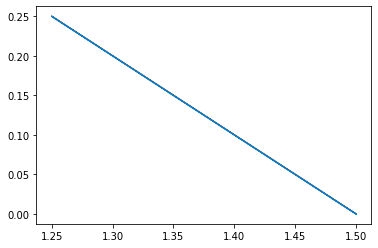

In [207]:
plt.plot(transform_4(x,y)[0], transform_4(x,y)[1])

In [0]:
img_x = []
img_y = []

In [0]:
x = np.array([0,0,1,1])
y = np.array([0,1,1,0])

In [0]:
x = np.array(img_x)
y = np.array(img_y)

In [0]:


img_x += transform_1(x,y)[0].tolist()
img_y += transform_1(x,y)[1].tolist()

In [0]:
img_x += transform_2(x,y)[0].tolist()
img_y += transform_2(x,y)[1].tolist()


In [0]:
img_x += transform_3(x,y)[0].tolist()
img_y += transform_3(x,y)[1].tolist()

In [0]:
img_x += transform_4(x,y)[0].tolist()
img_y += transform_4(x,y)[1].tolist()

(-0.07500000000000001, 1.575, -0.07500000000000001, 1.575)

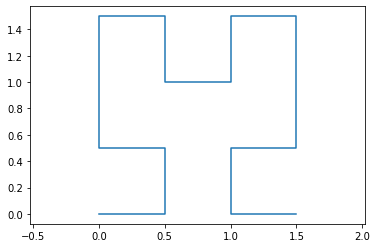

In [628]:
plt.plot(img_x, img_y)
plt.axis('equal')

In [0]:
x = np.array([0,0,1,1])
y = np.array([0,1,1,0])
for i in range(3):
  img_x = []
  img_y = []
  img_x += transform_1(x,y)[0].tolist()
  img_y += transform_1(x,y)[1].tolist()
  img_x += transform_2(x,y)[0].tolist()
  img_y += transform_2(x,y)[1].tolist()
  img_x += transform_3(x,y)[0].tolist()
  img_y += transform_3(x,y)[1].tolist()
  img_x += transform_4(x,y)[0].tolist() 
  img_y += transform_4(x,y)[1].tolist()
  x = np.array(img_x)
  y = np.array(img_y)

(-0.09375, 1.96875, -0.09375, 1.96875)

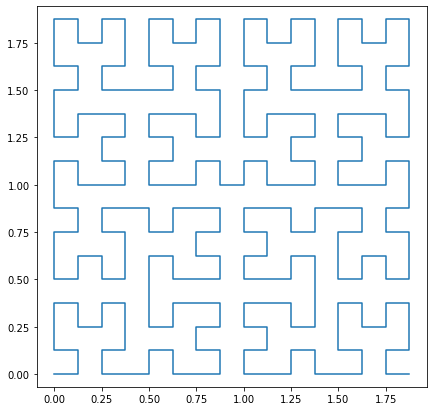

In [909]:
plt.figure(figsize=(7,7))
#plt.scatter(x,y, c=x+y,cmap='jet')
plt.plot(x,y)
plt.axis('equal')

# Turning the Hilbert curve into image

Well, the curve that you can see in the above figure is not useful by it self. 
This curve actually is showing that how you should put the data in a matrix (with what order). So in the following code I will put my data into a matrix which in fact is the image that I will feed into the CNN. But note that the data order indicated by the above path has not integer values. to cast them to the integer values with out losing data you should multiply it to the $1/(spacing_{between two points following each other}$).

In the following code I have put a sinusdal data plus some noise in the matrix

In [0]:
x_int = x * 1/(x[2]-x[0])
y_int = y * 1/(y[2]-y[0])

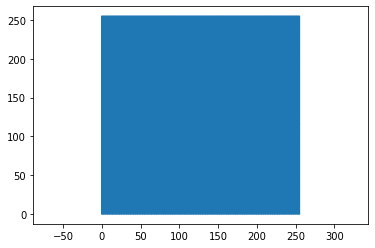

In [910]:
plt.axis('equal')
plt.plot(np.floor(x_int),np.floor(y_int))

In [865]:
x_int, y_int

(array([  0.,   1.,   1., ..., 254., 254., 255.]),
 array([0., 0., 1., ..., 1., 0., 0.]))

In [0]:
mat = np.zeros((int(x_int[-1]+1), int(x_int[-1]+1)))

In [867]:
mat.shape

(256, 256)

In [0]:
k = 0
m = 0
x = np.linspace(0,20,x_int.shape[0])
for i in range(mat.shape[0]):
  for j in range(mat.shape[0]):
    k+=0.001
    mat[int(x_int[m]), int(y_int[m])] = np.sin(2*np.pi*1*x[m]) + np.random.randn()
    #print(x_int[m])
    m+=1

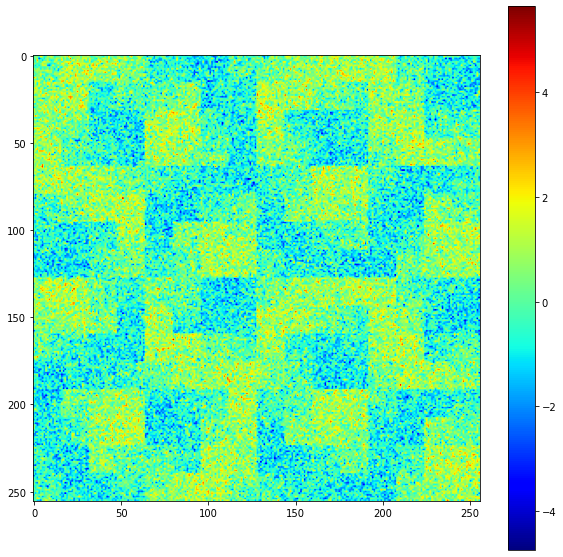

In [907]:
plt.figure(figsize=(10,10))
#plt.pcolor(mat,cmap = 'jet',edgecolors='k', linewidths=0.1)
plt.imshow(mat, cmap='jet')
plt.colorbar()

In [822]:
y_int

array([0., 0., 1., ..., 1., 0., 0.])

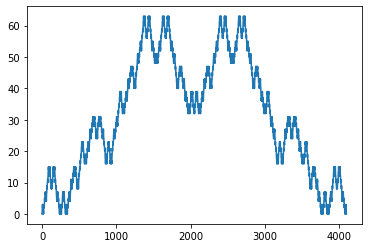

In [823]:
plt.plot(y_int)


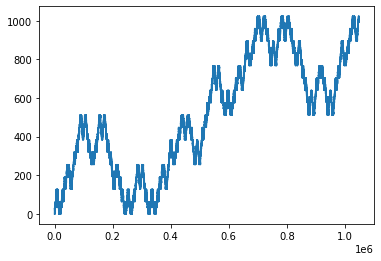

In [804]:
plt.plot(x_int)